In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

Starting with base T3.
Data from maxroll.gg and easymari.com

In [37]:
probabilities = pd.DataFrame(
    columns=('level', 'ilvl', 'base_rate'),
    data=[
        (1, 1304, 1.0),
        (2, 1307, 1.0),
        (3, 1310, 1.0),
        (4, 1315, 1.0),
        (5, 1320, 1.0),
        (6, 1325, 1.0),
        (7, 1330, 0.60),
        (8, 1335, 0.45),
        (9, 1340, 0.30),
        (10, 1345, 0.30),
        (11, 1350, 0.30),
        (12, 1355, 0.15),
        (13, 1360, 0.15),
        (14, 1365, 0.15),
        (15, 1370, 0.10),
    ]
)
probabilities

,level,ilvl,base_rate
0,1,1304,1.00
1,2,1307,1.00
2,3,1310,1.00
3,4,1315,1.00
4,5,1320,1.00
5,6,1325,1.00
6,7,1330,0.60
7,8,1335,0.45
8,9,1340,0.30
9,10,1345,0.30


In [38]:
gear_costs = pd.DataFrame(
    columns=('level', 'rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'),
    dtype=int,
    data=[
        ( 1,  82, 22, 2, 0, 11100,  0),
        ( 2,  82, 22, 2, 0, 11380,  0),
        ( 3,  82, 22, 2, 0, 11660,  0),
        ( 4, 120, 32, 4, 2, 11960,  0),
        ( 5, 120, 32, 4, 2, 12240,  0),
        ( 6, 120, 32, 4, 2, 12540,  0),
        ( 7, 156, 42, 4, 2, 12840, 70),
        ( 8, 156, 42, 4, 2, 13160, 70),
        ( 9, 156, 42, 4, 2, 13480, 70),
        (10, 192, 50, 6, 4, 13820, 70),
        (11, 192, 50, 6, 4, 14140, 70),
        (12, 192, 50, 6, 4, 14500, 70),
        (13, 228, 60, 6, 4, 14860, 70),  # this 6 stones seems wrong, should be 8?
        (14, 228, 60, 8, 4, 15220, 70),
        (15, 228, 60, 8, 4, 15600, 70),
    ]
)
gear_costs

,level,rocks,shards,stones,fusion,silver,gold
0,1,82,22,2,0,11100,0
1,2,82,22,2,0,11380,0
2,3,82,22,2,0,11660,0
3,4,120,32,4,2,11960,0
4,5,120,32,4,2,12240,0
5,6,120,32,4,2,12540,0
6,7,156,42,4,2,12840,70
7,8,156,42,4,2,13160,70
8,9,156,42,4,2,13480,70
9,10,192,50,6,4,13820,70


In [39]:
weapon_costs = pd.DataFrame(
    columns=('level', 'rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'),
    dtype=int,
    data=[
        ( 1, 138, 32,  4, 0, 15860,   0),
        ( 2, 138, 32,  4, 0, 16240,   0),
        ( 3, 198, 32,  6, 0, 16550,   0),  # rocks increase at lvl 4 for gear, weapon at 3, is this correct?
        ( 4, 198, 46,  6, 2, 17040,   0),
        ( 5, 198, 46,  6, 2, 17460,   0),
        ( 6, 198, 46,  6, 2, 17900,   0),
        ( 7, 258, 60,  8, 4, 18320, 120),
        ( 8, 258, 60,  8, 4, 18780, 120),
        ( 9, 258, 60,  8, 4, 19240, 120),
        (10, 320, 74, 10, 4, 19720, 120),
        (11, 320, 74, 10, 4, 20200, 120),
        (12, 320, 74, 10, 4, 20700, 120),
        (13, 380, 88, 10, 6, 21200, 120),
        (14, 380, 88, 12, 6, 21720, 120),
        (15, 380, 88, 12, 6, 22260, 120)
    ]
)
weapon_costs

,level,rocks,shards,stones,fusion,silver,gold
0,1,138,32,4,0,15860,0
1,2,138,32,4,0,16240,0
2,3,198,32,6,0,16550,0
3,4,198,46,6,2,17040,0
4,5,198,46,6,2,17460,0
5,6,198,46,6,2,17900,0
6,7,258,60,8,4,18320,120
7,8,258,60,8,4,18780,120
8,9,258,60,8,4,19240,120
9,10,320,74,10,4,19720,120


According to [earymari](https://www.easymari.com/en/t3_gear_honing_statistics) the success rate for an item increases by 0.1 * base_rate and artisan rate increases by 0.456 * current_rate. Upgrade chance becomes 100% once artisan rate reaches 100%. Success rate caps at 20% for +15.

In [40]:
num_simulations = 1_000_000

In [41]:
rates = []
for _, row in probabilities.iterrows():
    attempt = 0
    artisan_rate = 0.00
    success_rate = row.base_rate
    increase_rate = row.base_rate * 0.1
    while True:
        attempt += 1
        if artisan_rate >= 1 or success_rate >= 1:
            break
        rates.append((row.level, attempt, success_rate))
        artisan_rate = np.round(artisan_rate + 0.465 * success_rate, 4)
        # success rates only appear to cap for +15 at 0.2 so this heuristic should work
        success_rate = np.round(np.min([success_rate + increase_rate, row.base_rate * 2]), 4)
    rates.append((row.level, attempt, 1.0))

rates = pd.DataFrame(rates, columns=('level', 'attempts', 'success_rate'))
# rates.to_csv('rates.csv', index=False)
rates

,level,attempts,success_rate
0,1.0,1,1.0
1,2.0,1,1.0
2,3.0,1,1.0
3,4.0,1,1.0
4,5.0,1,1.0
...,...,...,...
81,15.0,11,0.2
82,15.0,12,0.2
83,15.0,13,0.2
84,15.0,14,0.2


In [42]:
df = (
    pd.concat([
        rates.assign(trial=i+1)
        for i in range(num_simulations)
    ])
    .assign(roll=np.random.uniform(size=rates.shape[0]*num_simulations))
    .query('roll < success_rate')
    .drop(['roll', 'success_rate'], axis=1)
    .groupby(['trial', 'level'], as_index=False)
    .first()
)

df

,trial,level,attempts
0,1,1.0,1
1,1,2.0,1
2,1,3.0,1
3,1,4.0,1
4,1,5.0,1
...,...,...,...
14999995,1000000,11.0,3
14999996,1000000,12.0,2
14999997,1000000,13.0,2
14999998,1000000,14.0,2


In [43]:
df.pivot(index='trial', columns='level')

attempts                                                              \
level       1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0 11.0 12.0 13.0   
trial                                                                          
1              1    1    1    1    1    1    1    3    3    1    2    1    1   
2              1    1    1    1    1    1    2    3    3    4    3    4    1   
3              1    1    1    1    1    1    1    2    3    7    2   11    4   
4              1    1    1    1    1    1    1    2    2    1    3    3   11   
5              1    1    1    1    1    1    3    1    1    1    2    8    5   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
999996         1    1    1    1    1    1    2    1    7    3    5    4    8   
999997         1    1    1    1    1    1    1    1    5    1    3    3    4   
999998         1    1    1    1    1    1    2    1    2    2    1    6    1   
999999         1    1    1    1    1    1    1    2    1    7    1    3    6   
1000000        1    1    1    1    1    1    1    4    1    1    3    2    2   

                   
level   14.0 15.0  
trial              
1          1   10  
2          8    6  
3          1    8  
4          2    5  
5          5    7  
...      ...  ...  
999996     2    2  
999997     5    8  
999998     6    5  
999999     3    2  
1000000    2   12  

[1000000 rows x 15 columns]

<AxesSubplot:xlabel='level', ylabel='attempts'>

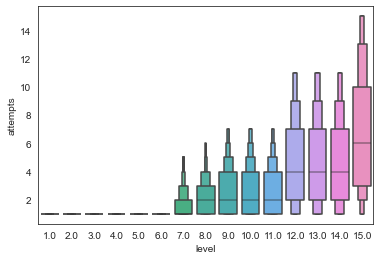

In [45]:
sb.boxenplot(data=df, x='level', y='attempts')

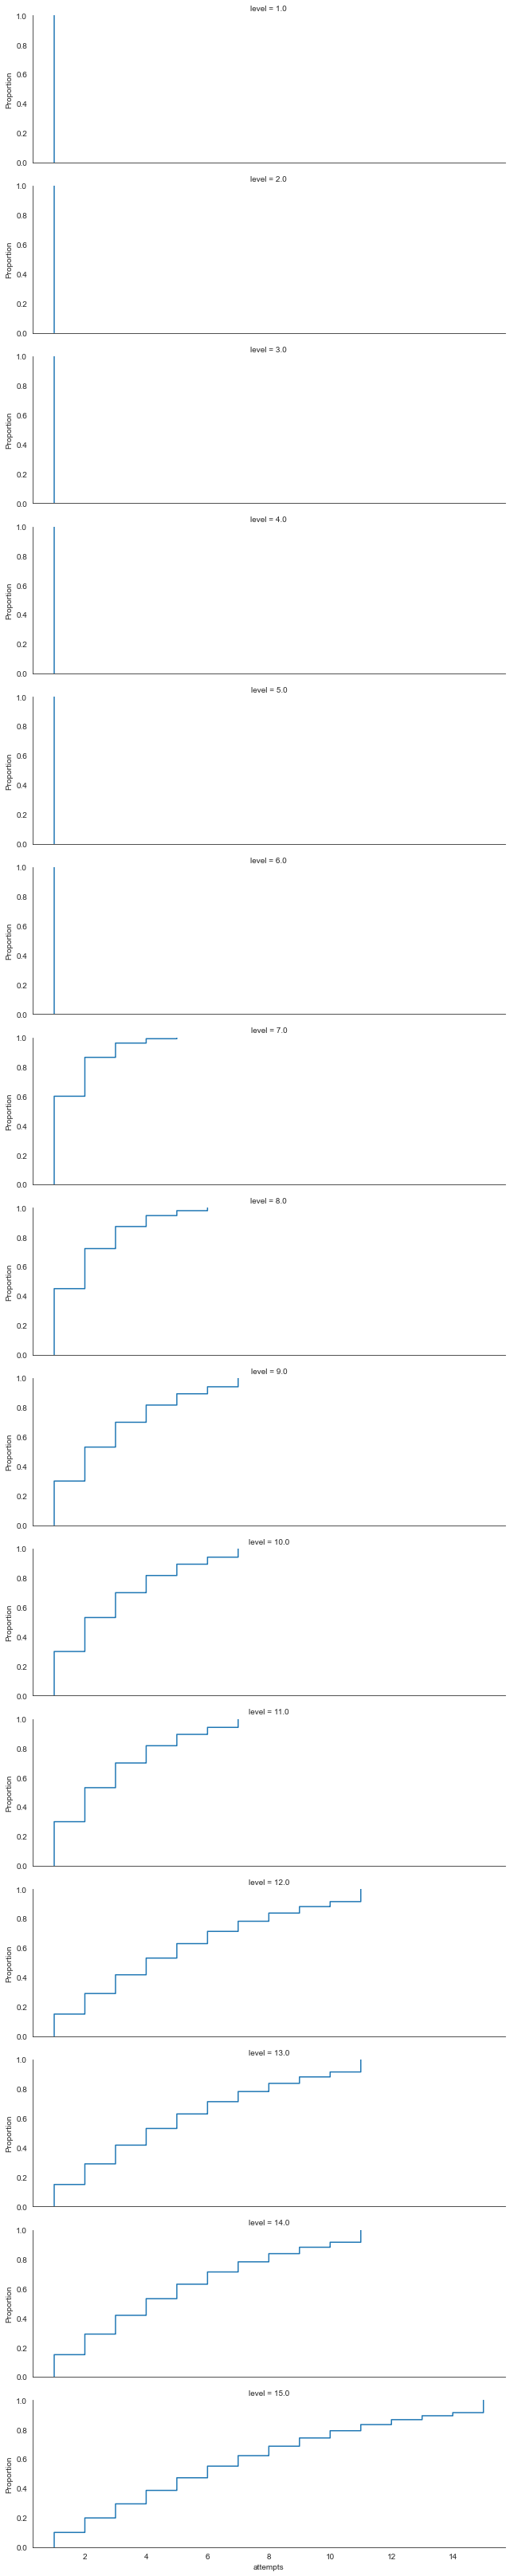

In [46]:
sb.displot(df, x='attempts', row='level', kind='ecdf', aspect=3, height=3)

cummulative probabilities

In [47]:
(
    (
        df
        .drop('trial', axis=1)
        .groupby('level')
        .value_counts()
        .div(num_simulations)
    )
    .reset_index()
    .rename({0: 'p'}, axis=1)
    .pivot(index='level', columns='attempts')
    .apply(np.cumsum, axis=1)
    .applymap(lambda p: np.round(p, 2))
    .fillna('--')
)

p                                                              \
attempts    1     2     3     4     5     6     7     8     9     10    11   
level                                                                        
1.0       1.00    --    --    --    --    --    --    --    --    --    --   
2.0       1.00    --    --    --    --    --    --    --    --    --    --   
3.0       1.00    --    --    --    --    --    --    --    --    --    --   
4.0       1.00    --    --    --    --    --    --    --    --    --    --   
5.0       1.00    --    --    --    --    --    --    --    --    --    --   
6.0       1.00    --    --    --    --    --    --    --    --    --    --   
7.0       0.60  0.86  0.96  0.99   1.0    --    --    --    --    --    --   
8.0       0.45  0.72  0.87  0.95  0.98   1.0    --    --    --    --    --   
9.0       0.30  0.53   0.7  0.82  0.89  0.94   1.0    --    --    --    --   
10.0      0.30  0.53   0.7  0.82  0.89  0.94   1.0    --    --    --    --   
11.0      0.30  0.53   0.7  0.82  0.89  0.94   1.0    --    --    --    --   
12.0      0.15  0.29  0.42  0.53  0.63  0.71  0.78  0.84  0.88  0.92   1.0   
13.0      0.15  0.29  0.42  0.53  0.63  0.71  0.78  0.84  0.88  0.92   1.0   
14.0      0.15  0.29  0.42  0.53  0.63  0.71  0.78  0.84  0.88  0.92   1.0   
15.0      0.10   0.2  0.29  0.39  0.47  0.55  0.62  0.69  0.74  0.79  0.83   

                                 
attempts    12    13    14   15  
level                            
1.0         --    --    --   --  
2.0         --    --    --   --  
3.0         --    --    --   --  
4.0         --    --    --   --  
5.0         --    --    --   --  
6.0         --    --    --   --  
7.0         --    --    --   --  
8.0         --    --    --   --  
9.0         --    --    --   --  
10.0        --    --    --   --  
11.0        --    --    --   --  
12.0        --    --    --   --  
13.0        --    --    --   --  
14.0        --    --    --   --  
15.0      0.87  0.89  0.92  1.0

failure rates by level

In [48]:
(
    (
        df
        .drop('trial', axis=1)
        .groupby('level')
        .value_counts()
        .div(num_simulations)
    )
    .reset_index()
    .rename({0: 'p'}, axis=1)
    .pivot(index='level', columns='attempts')
    .apply(np.cumsum, axis=1)
    .applymap(lambda p: np.round(p, 2))
    .applymap(lambda p: 1-p)
    .fillna('--')
)

p                                                              \
attempts    1     2     3     4     5     6     7     8     9     10    11   
level                                                                        
1.0       0.00    --    --    --    --    --    --    --    --    --    --   
2.0       0.00    --    --    --    --    --    --    --    --    --    --   
3.0       0.00    --    --    --    --    --    --    --    --    --    --   
4.0       0.00    --    --    --    --    --    --    --    --    --    --   
5.0       0.00    --    --    --    --    --    --    --    --    --    --   
6.0       0.00    --    --    --    --    --    --    --    --    --    --   
7.0       0.40  0.14  0.04  0.01   0.0    --    --    --    --    --    --   
8.0       0.55  0.28  0.13  0.05  0.02   0.0    --    --    --    --    --   
9.0       0.70  0.47   0.3  0.18  0.11  0.06   0.0    --    --    --    --   
10.0      0.70  0.47   0.3  0.18  0.11  0.06   0.0    --    --    --    --   
11.0      0.70  0.47   0.3  0.18  0.11  0.06   0.0    --    --    --    --   
12.0      0.85  0.71  0.58  0.47  0.37  0.29  0.22  0.16  0.12  0.08   0.0   
13.0      0.85  0.71  0.58  0.47  0.37  0.29  0.22  0.16  0.12  0.08   0.0   
14.0      0.85  0.71  0.58  0.47  0.37  0.29  0.22  0.16  0.12  0.08   0.0   
15.0      0.90   0.8  0.71  0.61  0.53  0.45  0.38  0.31  0.26  0.21  0.17   

                                 
attempts    12    13    14   15  
level                            
1.0         --    --    --   --  
2.0         --    --    --   --  
3.0         --    --    --   --  
4.0         --    --    --   --  
5.0         --    --    --   --  
6.0         --    --    --   --  
7.0         --    --    --   --  
8.0         --    --    --   --  
9.0         --    --    --   --  
10.0        --    --    --   --  
11.0        --    --    --   --  
12.0        --    --    --   --  
13.0        --    --    --   --  
14.0        --    --    --   --  
15.0      0.13  0.11  0.08  0.0

expected attempts per level

In [49]:
stats = df.drop('trial', axis=1).groupby('level').describe(percentiles=[0.5])
stats.columns = ['_'.join(col) for col in stats.columns.to_flat_index()]
stats = (
    stats
    .reset_index()
    .drop(['attempts_count', 'attempts_mean', 'attempts_std'] , axis=1)
    .astype(int)
)
stats

,level,attempts_min,attempts_50%,attempts_max
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1
5,6,1,1,1
6,7,1,1,5
7,8,1,2,6
8,9,1,2,7
9,10,1,2,7


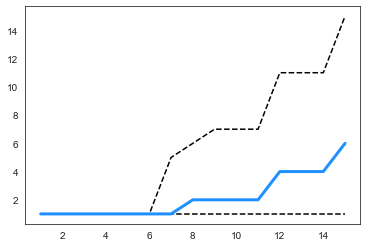

In [50]:
plt.plot(stats['level'], stats['attempts_min'], color='black', ls='--')
plt.plot(stats['level'], stats['attempts_max'], color='black', ls='--')
plt.plot(stats['level'], stats['attempts_50%'], color='dodgerblue', lw=3)

cummulative total attempts to +15

In [51]:
(
    stats
    .drop('level', axis=1)
    .apply(np.cumsum)
    .assign(level=stats['level'])
)

,attempts_min,attempts_50%,attempts_max,level
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,4,4,4,4
4,5,5,5,5
5,6,6,6,6
6,7,7,11,7
7,8,9,17,8
8,9,11,24,9
9,10,13,31,10


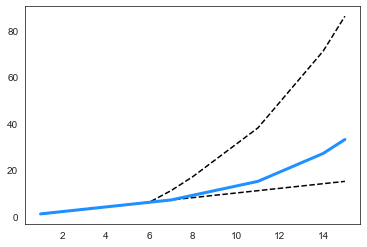

In [52]:
plt.plot(stats['level'], stats['attempts_min'].cumsum(), color='black', ls='--')
plt.plot(stats['level'], stats['attempts_max'].cumsum(), color='black', ls='--')
plt.plot(stats['level'], stats['attempts_50%'].cumsum(), color='dodgerblue', lw=3)

## weapon honing

expected materials per level

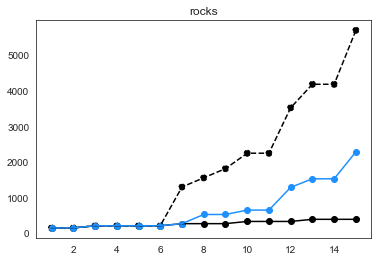

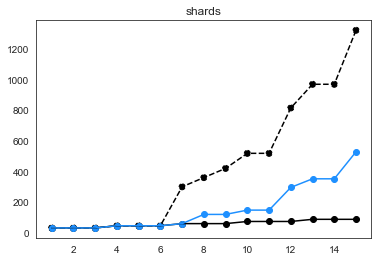

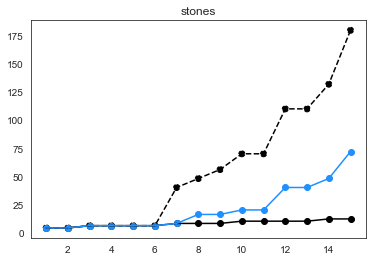

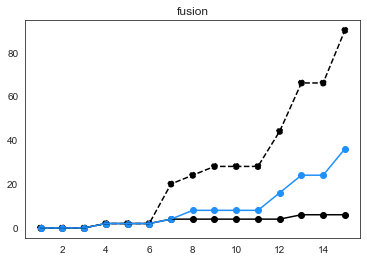

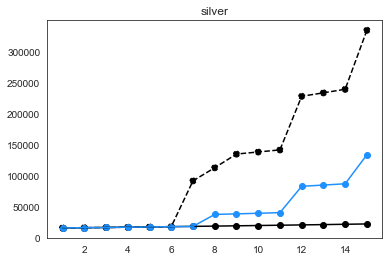

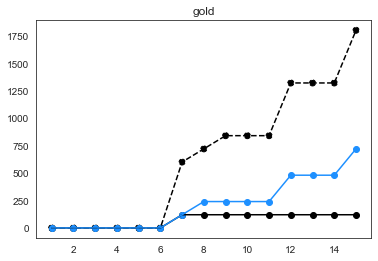

In [53]:
for resource in ('rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'):
    for stat, color, ls in [
        ('attempts_min', 'black', '-'),
        ('attempts_max', 'black', '--'),
        ('attempts_50%', 'dodgerblue', '-'),
    ]:
        totals = stats[stat] * weapon_costs[resource]
        plt.plot(stats['level'], totals, ls=ls, color=color, label=stat)
        plt.scatter(stats['level'], totals, ls=ls, color=color, label=stat)
        plt.title(resource)
    plt.show()

total expected materials

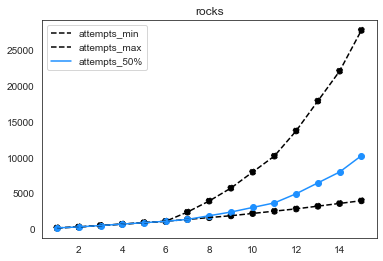

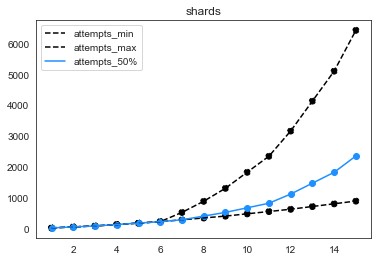

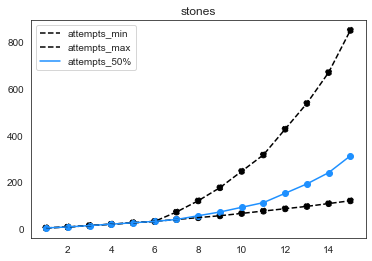

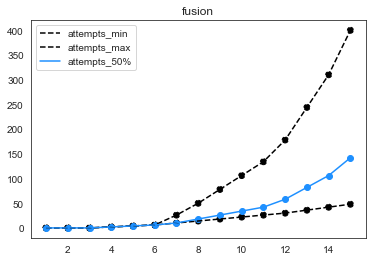

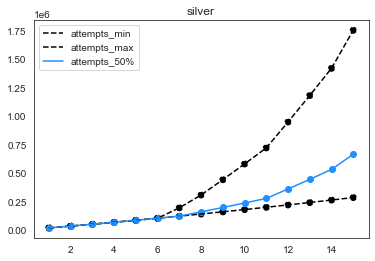

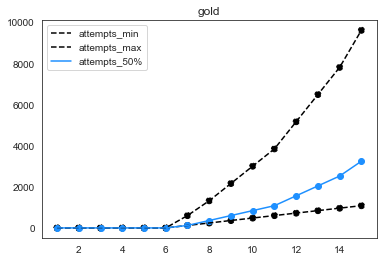

In [54]:
for resource in ('rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'):
    for stat, color, ls in [
        ('attempts_min', 'black', '--'),
        ('attempts_max', 'black', '--'),
        ('attempts_50%', 'dodgerblue', '-'),
    ]:
        cumm_totals = (stats[stat] * weapon_costs[resource]).cumsum()
        plt.plot(stats['level'], cumm_totals, label=stat, color=color, ls=ls)
        plt.scatter(stats['level'], cumm_totals, label=None, color=color, ls=ls)
        plt.legend()
        plt.title(resource)
    plt.show()

In [55]:
for resource in ('rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'):
    print(resource)
    print(
        stats[['attempts_min', 'attempts_50%', 'attempts_max']]
        .multiply(weapon_costs[resource], axis=0)
        .cumsum()
        .assign(level=stats.level)
    )
    print()

rocks
    attempts_min  attempts_50%  attempts_max  level
0            138           138           138      1
1            276           276           276      2
2            474           474           474      3
3            672           672           672      4
4            870           870           870      5
5           1068          1068          1068      6
6           1326          1326          2358      7
7           1584          1842          3906      8
8           1842          2358          5712      9
9           2162          2998          7952     10
10          2482          3638         10192     11
11          2802          4918         13712     12
12          3182          6438         17892     13
13          3562          7958         22072     14
14          3942         10238         27772     15

shards
    attempts_min  attempts_50%  attempts_max  level
0             32            32            32      1
1             64            64            64      

## gear honing

resources per level

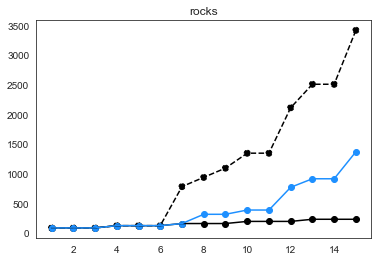

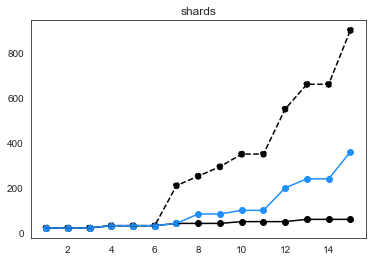

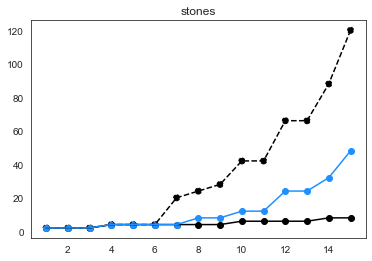

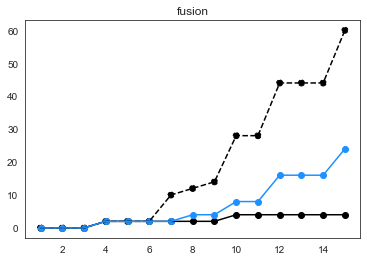

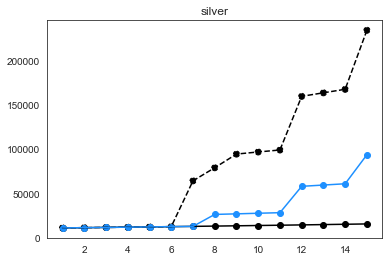

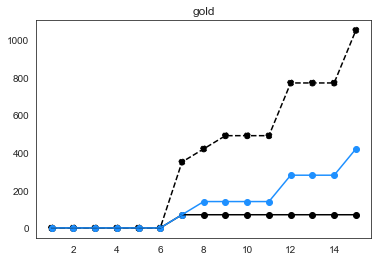

In [56]:
for resource in ('rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'):
    for stat, color, ls in [
        ('attempts_min', 'black', '-'),
        ('attempts_max', 'black', '--'),
        ('attempts_50%', 'dodgerblue', '-'),
    ]:
        totals = stats[stat] * gear_costs[resource]
        plt.plot(stats['level'], totals, ls=ls, color=color, label=stat)
        plt.scatter(gear_costs['level'], totals, ls=ls, color=color, label=stat)
        plt.title(resource)
    plt.show()

total resources

In [57]:
for resource in ('rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'):
    for stat, color, ls in [
        ('attempts_min', 'black', '--'),
        ('attempts_max', 'black', '--'),
        ('attempts_50%', 'dodgerblue', '-'),
    ]:
        cumm_totals = (stats[stat] * gear_costs[resource]).cumsum().multiply(5, axis=0)
        plt.plot(stats['level'], cumm_totals, label=stat, color=color, ls=ls)
        plt.scatter(stats['level'], cumm_totals, label=None, color=color, ls=ls)
        plt.legend()
        plt.title(resource)
    plt.show()

rocks
    attempts_min  attempts_50%  attempts_max  level
0            138           138           138      1
1            276           276           276      2
2            474           474           474      3
3            672           672           672      4
4            870           870           870      5
5           1068          1068          1068      6
6           1326          1326          2358      7
7           1584          1842          3906      8
8           1842          2358          5712      9
9           2162          2998          7952     10
10          2482          3638         10192     11
11          2802          4918         13712     12
12          3182          6438         17892     13
13          3562          7958         22072     14
14          3942         10238         27772     15

shards
    attempts_min  attempts_50%  attempts_max  level
0             32            32            32      1
1             64            64            64      

In [58]:
for resource in ('rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'):
    print(resource)
    print(
        stats[['attempts_min', 'attempts_50%', 'attempts_max']]
        .multiply(gear_costs[resource], axis=0)
        .cumsum()
        # .multiply(5, axis=0)  # 5 pieces of gear
        .assign(level=stats.level)
        .astype(int)
    )
    print()

rocks
    attempts_min  attempts_50%  attempts_max  level
0            410           410           410      1
1            820           820           820      2
2           1230          1230          1230      3
3           1830          1830          1830      4
4           2430          2430          2430      5
5           3030          3030          3030      6
6           3810          3810          6930      7
7           4590          5370         11610      8
8           5370          6930         17070      9
9           6330          8850         23790     10
10          7290         10770         30510     11
11          8250         14610         41070     12
12          9390         19170         53610     13
13         10530         23730         66150     14
14         11670         30570         83250     15

shards
    attempts_min  attempts_50%  attempts_max  level
0            110           110           110      1
1            220           220           220      

In [59]:
__df = df.merge(weapon_costs, on='level')

In [60]:
for resource in ('rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'):
    __df[resource] *= __df['attempts']
__df

,trial,level,attempts,rocks,shards,stones,fusion,silver,gold
0,1,1.0,1,138,32,4,0,15860,0
1,2,1.0,1,138,32,4,0,15860,0
2,3,1.0,1,138,32,4,0,15860,0
3,4,1.0,1,138,32,4,0,15860,0
4,5,1.0,1,138,32,4,0,15860,0
...,...,...,...,...,...,...,...,...,...
14999995,999996,15.0,2,760,176,24,12,44520,240
14999996,999997,15.0,8,3040,704,96,48,178080,960
14999997,999998,15.0,5,1900,440,60,30,111300,600
14999998,999999,15.0,2,760,176,24,12,44520,240


In [61]:
__df = (
    __df
    .melt(
        id_vars=['level', 'trial'],
        value_vars=['rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'],
        var_name='resource',
        value_name='total'
    )
)
__df

,level,trial,resource,total
0,1.0,1,rocks,138
1,1.0,2,rocks,138
2,1.0,3,rocks,138
3,1.0,4,rocks,138
4,1.0,5,rocks,138
...,...,...,...,...
89999995,15.0,999996,gold,240
89999996,15.0,999997,gold,960
89999997,15.0,999998,gold,600
89999998,15.0,999999,gold,240


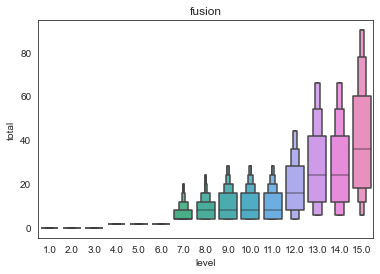

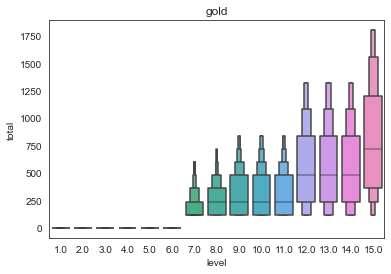

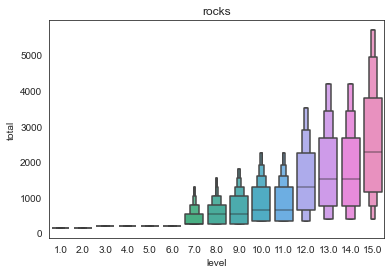

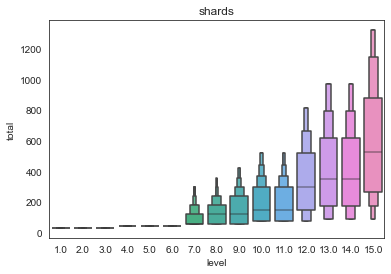

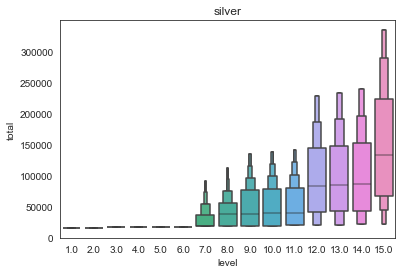

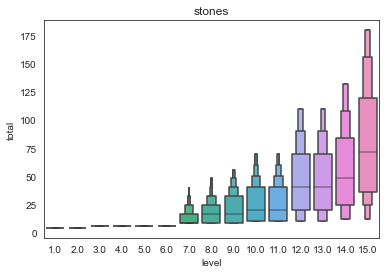

In [62]:
for res, gdf in __df.groupby('resource'):
    sb.boxenplot(data=gdf, x='level', y='total')
    plt.title(res)
    plt.show()

In [63]:
tdf = __df.groupby(['trial', 'resource'])['total'].sum().reset_index()
tdf

,trial,resource,total
0,1,fusion,122
1,1,gold,2760
2,1,rocks,8714
3,1,shards,2006
4,1,silver,579770
...,...,...,...
5999995,1000000,gold,3360
5999996,1000000,rocks,10616
5999997,1000000,shards,2446
5999998,1000000,silver,688410


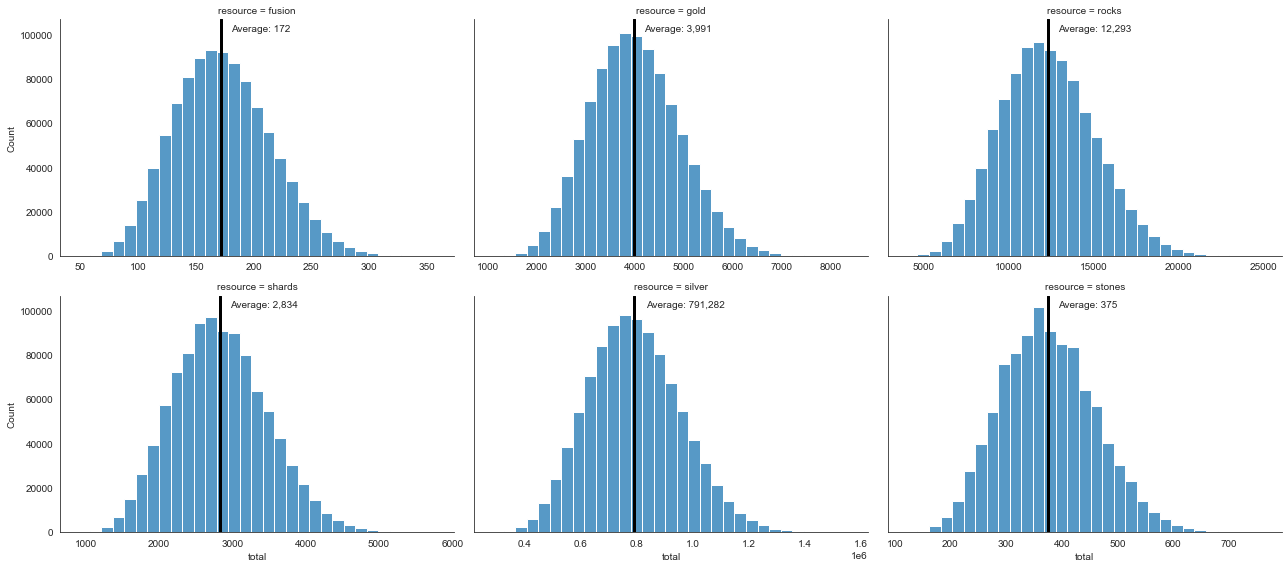

In [64]:
sb.set_style('white')
g = sb.FacetGrid(tdf, col='resource', sharex=False, col_wrap=3, aspect=1.5, height=4)
g.map(sb.histplot, 'total', bins=31)
g.map(lambda x, **kw: plt.axvline(x.mean(), color="k", lw=3), 'total')
g.map(lambda x, **kwargs: plt.annotate(
    f'Average: {x.mean():,.0f}',
    xy=(x.mean()*1.05, .95),
    xycoords=plt.gca().get_xaxis_transform(),
    ha='left'
), 'total')

In [65]:
__df = df.merge(gear_costs, on='level')

In [66]:
for resource in ('rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'):
    __df[resource] *= __df['attempts']
__df

,trial,level,attempts,rocks,shards,stones,fusion,silver,gold
0,1,1.0,1,82,22,2,0,11100,0
1,2,1.0,1,82,22,2,0,11100,0
2,3,1.0,1,82,22,2,0,11100,0
3,4,1.0,1,82,22,2,0,11100,0
4,5,1.0,1,82,22,2,0,11100,0
...,...,...,...,...,...,...,...,...,...
14999995,999996,15.0,2,456,120,16,8,31200,140
14999996,999997,15.0,8,1824,480,64,32,124800,560
14999997,999998,15.0,5,1140,300,40,20,78000,350
14999998,999999,15.0,2,456,120,16,8,31200,140


In [67]:
__df = (
    __df
    .melt(
        id_vars=['level', 'trial'],
        value_vars=['rocks', 'shards', 'stones', 'fusion', 'silver', 'gold'],
        var_name='resource',
        value_name='total'
    )
)
__df

,level,trial,resource,total
0,1.0,1,rocks,82
1,1.0,2,rocks,82
2,1.0,3,rocks,82
3,1.0,4,rocks,82
4,1.0,5,rocks,82
...,...,...,...,...
89999995,15.0,999996,gold,140
89999996,15.0,999997,gold,560
89999997,15.0,999998,gold,350
89999998,15.0,999999,gold,140


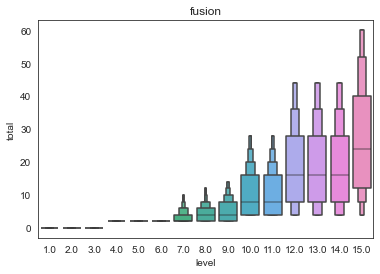

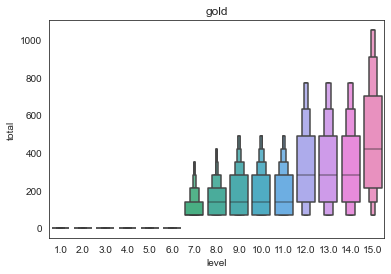

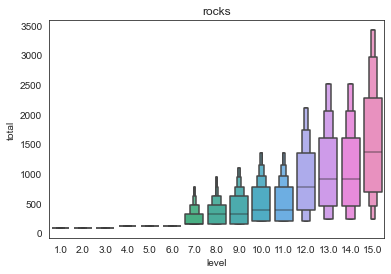

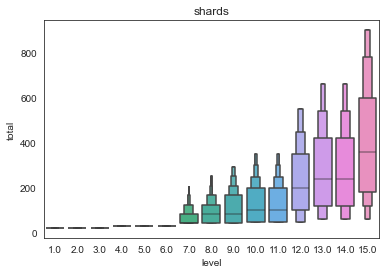

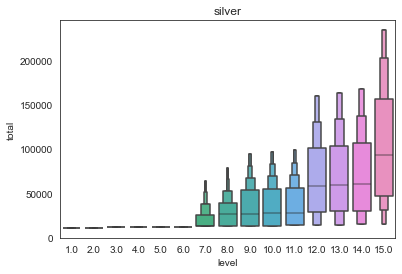

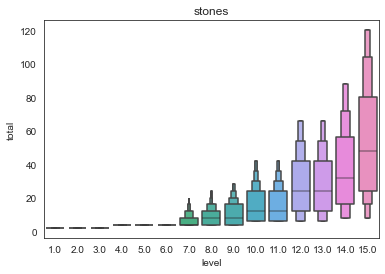

In [68]:
for res, gdf in __df.groupby('resource'):
    sb.boxenplot(data=gdf, x='level', y='total')
    plt.title(res)
    plt.show()

In [69]:
tdf = __df.groupby(['trial', 'resource'])['total'].sum().reset_index()
tdf

,trial,resource,total
0,1,fusion,84
1,1,gold,1610
2,1,rocks,5202
3,1,shards,1376
4,1,silver,406320
...,...,...,...
5999995,1000000,gold,1960
5999996,1000000,rocks,6342
5999997,1000000,shards,1674
5999998,1000000,silver,482440


Text(0.5, 1.02, 'Gear Honing Totals')

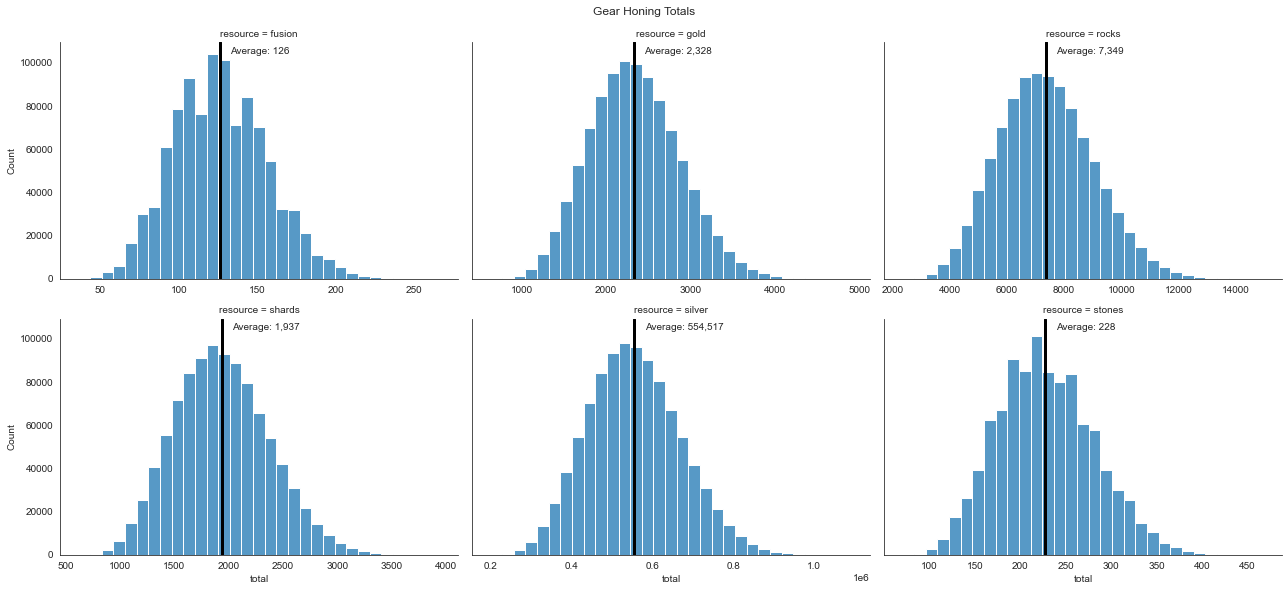

In [71]:
sb.set_style('white')
g = sb.FacetGrid(tdf, col='resource', sharex=False, col_wrap=3, aspect=1.5, height=4)
g.map(sb.histplot, 'total', bins=31)
g.map(lambda x, **kw: plt.axvline(x.mean(), color="k", lw=3), 'total')
g.map(lambda x, **kwargs: plt.annotate(
    f'Average: {x.mean():,.0f}',
    xy=(x.mean()*1.05, .95),
    xycoords=plt.gca().get_xaxis_transform(),
    ha='left'
), 'total')
plt.suptitle('Gear Honing Totals', y=1.02)